In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Useful Functions
def Calc_eqWidth2(data, start, finish, cIntensity):
    """PASO 1
    Función para calcular el Equivalent Width de acuerdo a la definición de arriba.
    
    data: DataFrame que contiene los datos
    start: Inicio (En Angstroms) del rango de integración
    finish: Fin (En Angstroms) del rango de integración
    cIntensity: Intensidad de fondo
    """
    df = pd.DataFrame()
    df['wavelength'] = data[(data['wavelength'] >= start) & (data['wavelength'] <= finish)]['wavelength']
    df['I'] = data[(data['wavelength'] >= start) & (data['wavelength'] <= finish)]['I']

    df['Integrand'] = 1 - (df['I'] / cIntensity)

    # Calculate the equivalent width using numerical integration (trapezoidal rule)
    eqWidth = np.trapz(df['Integrand'], df['wavelength'])

    return df, eqWidth

def vertPos_COG(eqWidth, wavelength):
    """PASO 2"""
    return np.log10(eqWidth/wavelength)

def NAtoms_LowerState(f, wavelength, x):
    """PASO 3"""
    return 10**(x - np.log10(f*(wavelength/5000)))

def AtomsRatioStates(gb,ga,Eb,Ea):
    """PASO 4"""
    x = (Eb-Ea)*1.60218e-19
    return (gb/ga) * np.exp(-(x)/(4.97e-20))

def AtomsRatioIonized(z1,z2,chi):
    a = 5.22e26
    chi = chi * 1.60218e-19
    return (2 * z2)/(1.25e19*z1) * a * np.exp(-chi/4.97e-20)

def AtomAbundance(Total):
    return np.log10(Total/6.59e23) + 12

In [3]:
data = pd.read_csv('betelgeuse.txt', sep=' ', header=None)
data.columns = ['px', 'I']
data.describe()

,px,I
count,1530.00000,1530.000000
mean,764.50000,12580.575163
std,441.81727,2468.310647
min,0.00000,1978.000000
25%,382.25000,12059.750000
50%,764.50000,13069.000000
75%,1146.75000,13763.500000
max,1529.00000,32766.000000


In [4]:
idx = data[["I"]].idxmax()
data.iloc[idx] = 12500
data.iloc[idx]

,px,I
1321,12500,12500


In [5]:
pos_Halpha = data['I'].idxmin()
print("la posicion de Halpha es el pixel:" ,pos_Halpha)

la posicion de Halpha es el pixel: 761


In [6]:
stepsize = 1/30 # Orden 2
start = 6562.92-(pos_Halpha*stepsize) 
stop = 6562.92 + ((data['px'].size - pos_Halpha)*stepsize)

start, stop

(6537.553333333333, 6588.553333333333)

In [7]:
wavelength = np.arange(start=start, stop=stop, step=stepsize)
wavelength.size, wavelength[pos_Halpha]

(1530, 6562.920000000323)

In [8]:
data = data.drop(['wavelength'], axis=1, errors='ignore')

data.insert(column='wavelength', value=wavelength, loc=2)
data.describe()

,px,I,wavelength
count,1530.000000,1530.000000,1530.000000
mean,771.806536,12567.329412,6563.036667
std,533.872418,2413.690923,14.727242
min,0.000000,1978.000000,6537.553333
25%,382.250000,12059.750000,6550.295000
50%,764.500000,13068.000000,6563.036667
75%,1146.750000,13761.750000,6575.778333
max,12500.000000,30122.000000,6588.520000


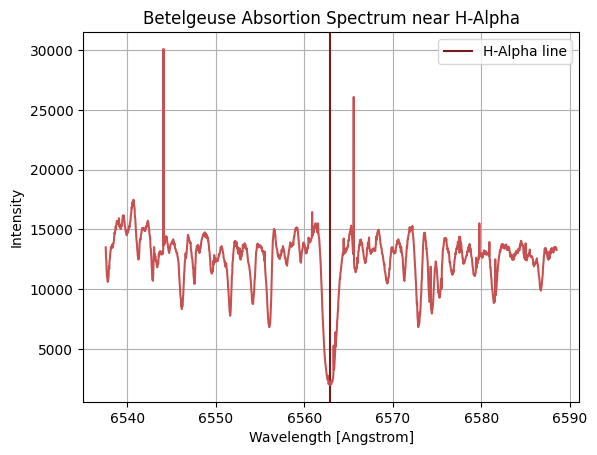

In [9]:
plt.axvline(x = data['wavelength'].loc[pos_Halpha], color = '#761B1B', label = 'H-Alpha line')
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Intensity')
plt.title('Betelgeuse Absortion Spectrum near H-Alpha')
plt.plot(data['wavelength'], data['I'], color = '#C95050')
plt.grid()
plt.legend()
plt.show()

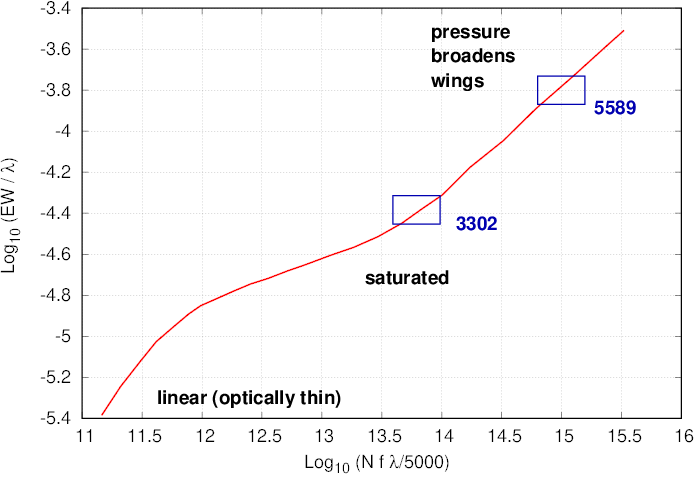

In [10]:
def plot_spectrum(data, start, finish, hor = None, ver = None):
    """Se define una función para graficar el espectro de absorción, dado un rango de wavelengths.
    El propósito es poder ubicar el rango al que pertenece una línea de absorción
    """
    filtered_data = data[(data['wavelength'] >= start) & (data['wavelength'] <= finish)]

    plt.xlabel('Wavelength [Angstrom]')
    plt.ylabel('Intensity')
    plt.title('Absorption Spectrum')
    plt.plot(filtered_data['wavelength'], filtered_data['I'])
    if (hor != None):
        plt.axhline(y = hor, color='b', label = 'underlying continuum intensity')
    if (ver != None):
        plt.axvline(x = ver, color = 'r', label = 'Spectral line')
    
    plt.grid()
    plt.show()

## Abundancia en Hidrógeno

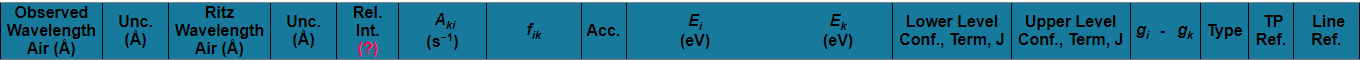


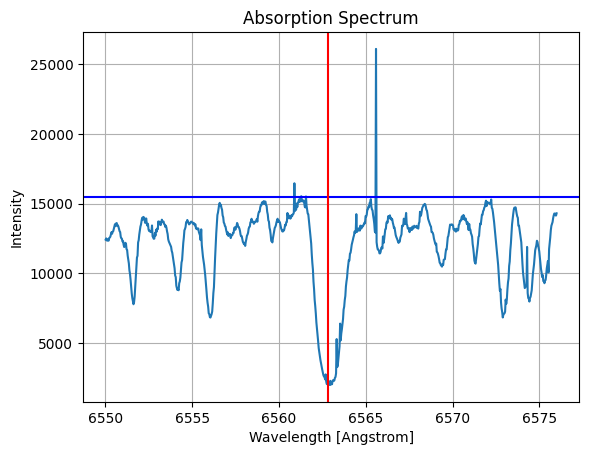

In [11]:
plot_spectrum(data, 6550,6576, ver=6562.8, hor=15500
              )

In [12]:
_, HI6562_eqWidth = Calc_eqWidth2(data=data, start=6561.3, finish=6565.3,cIntensity=15500)
print("HI6562 eqWidth = ",HI6562_eqWidth)

y = vertPos_COG(HI6562_eqWidth, 6562.8)
print("HI6562 y = ",y)

x=15.4

NH6562_LowerState = NAtoms_LowerState(f=6.41e-01, wavelength=6562.8, x=15.4)
print("Number of atoms of H6562 in Lower state = ",NH6562_LowerState)

NH6562 = NH6562_LowerState*(1 + AtomsRatioStates(18,8,12.0875,10.1988))
print("Number of atoms of H6562: ", NH6562)

NH_Total = NH6562*(1 + AtomsRatioIonized(z1=2.00, z2=2.0, chi=13.598433))
print("Number of atoms of H: ", NH_Total)



HI6562 eqWidth =  1.6742204301288444
HI6562 y =  -3.593276532200954
Number of atoms of H6562 in Lower state =  2985539389542716.0
Number of atoms of H6562:  3000778414293981.0
Number of atoms of H:  3000778414316928.0


Fe I

https://physics.nist.gov/cgi-bin/ASD/lines1.pl?spectra=Fe+I&output_type=0&low_w=6545&upp_w=6548&unit=0&submit=Retrieve+Data&de=0&plot_out=0&I_scale_type=1&format=0&line_out=0&en_unit=1&output=0&bibrefs=1&page_size=15&show_obs_wl=1&show_calc_wl=1&unc_out=1&order_out=0&max_low_enrg=&show_av=2&max_upp_enrg=&tsb_value=0&min_str=&A_out=0&f_out=on&intens_out=on&max_str=&allowed_out=1&forbid_out=1&min_accur=&min_intens=&conf_out=on&term_out=on&enrg_out=on&J_out=on&g_out=on


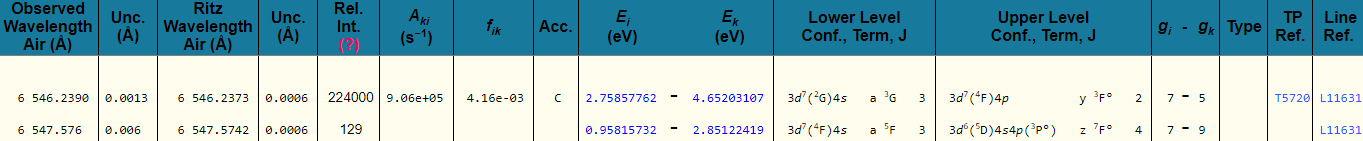

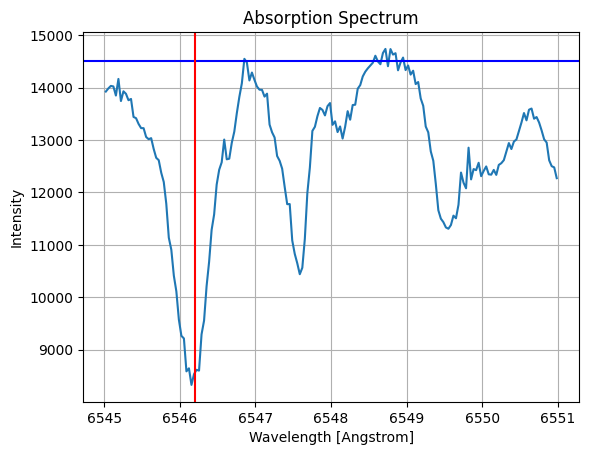

In [17]:
plot_spectrum(data, 6545,6551, ver=6546.2, hor=14500
              )

In [18]:
_, FeI6546_eqWidth = Calc_eqWidth2(data=data, start= 6545.2, finish=6546.9, cIntensity=14500)
print("FeI6546 equivalent width is: ",FeI6546_eqWidth)


FeI6546 equivalent width is:  0.3063574712682686


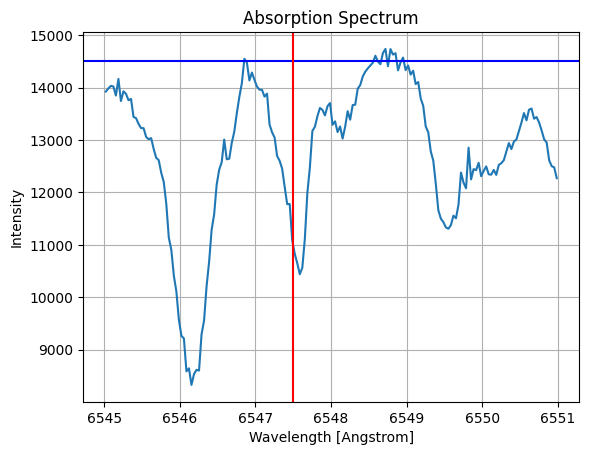

In [20]:
plot_spectrum(data, 6545,6551, ver=6547.5, hor=14500
              )

Ti I


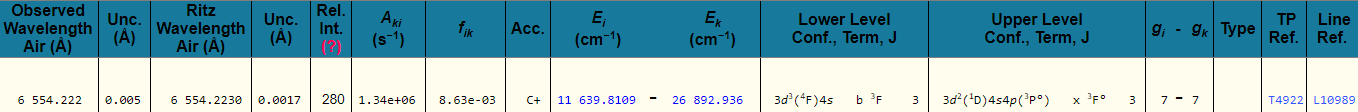

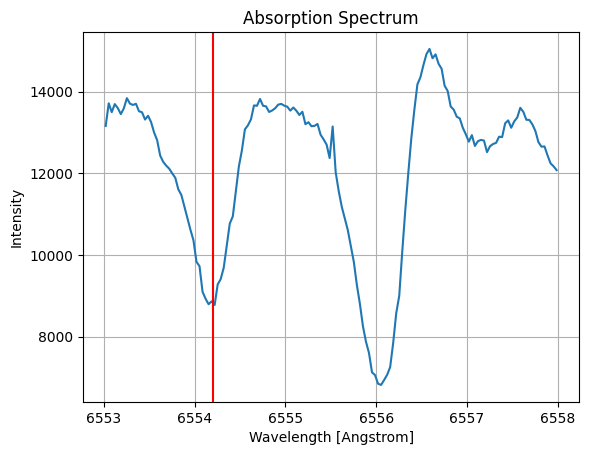

In [15]:
plot_spectrum(data, 6553,6558, ver=6554.2
              )

## Calcio I
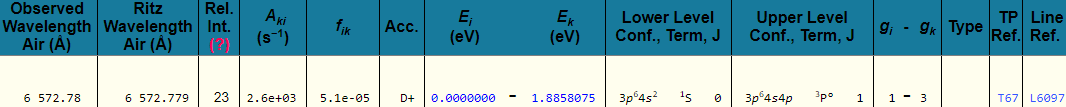

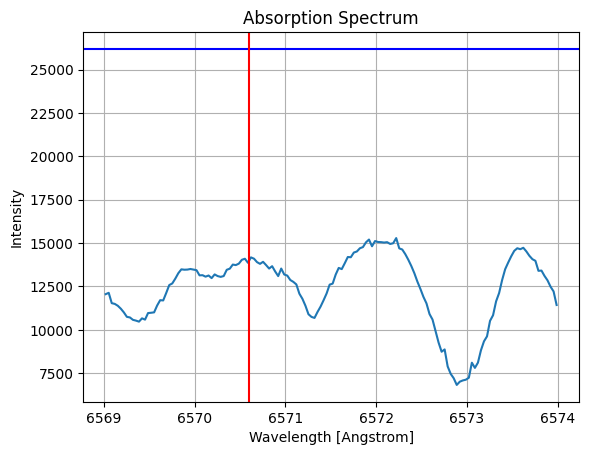

In [27]:
plot_spectrum(data, 6569,6574, hor=26200, ver=6570.6
              )

In [29]:
# Step 1: Calculate the equilibrium width of CaI (6572.78)
_, CaI6572_eqwidth = Calc_eqWidth2(data=data, start= 6570.6, finish=6572, cIntensity=32800)
print("CaI6572_eqwidth: ", CaI6572_eqwidth)

print("Ratios are", AtomsRatioIonized(chi=6.11316, z1=1.36, z2=2.35), AtomsRatioIonized(chi=6.11316, z1=1.36, z2=2.35) * AtomsRatioIonized(chi=11.87172, z1=2.35, z2=1.0))

CaI6572_eqwidth:  0.816969004075443
Ratios are 0.39872628036673574 3.3928223709824596e-10
